
# Project: Investigate a Dataset (TMDb Movie Data )

Investigate a Dataset is the second project in Data Analyst Nanodegree, it aims to  use the Python libraries NumPy, Pandas, and Matplotlib. To analyze the dataset and then communicate the findings.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Dataset**: 
 <br>
I will investigate the dataset of The Movie Database (TMDb), which contains around 10,000 movies gathered from TMDb, including features such as revenue, rating, cast, and other features. Also, the dataset contains some missing  values            
 **Rows** = 10866  
 **Columns** = 21
 
 **Questions**: 
 
- 1- Which movie has the highest and lowest profit?
-    1-A Top 5 movies which earned highest profit.

- 2- Which Movie has the highest and lowest rate?
-    2-A Top 5 lowest rated movies.

- 3- Which the most popular runtime length of a movie?

- 4- The average runtime of movies over years?

- 5- Is the rating of movies increase or decrease or the same over years ?

- 6- Which movie genre has the highest release?


Find the original problem and the dataset here: https://www.kaggle.com/tmdb/tmdb-movie-metadata

Helps me get more knowledge about the dataset: https://www.themoviedb.org/?language=ar

In [1]:
# import some libraries needed for analyzing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset.


### General Properties

In [2]:
# Load the data and print. Perform operations to inspect data
# Load the dataset
df_tmdb = pd.read_csv('tmdb_movies.csv', sep = ',')

# Print the shape of the dataset
df_tmdb.shape


(10866, 21)

 - The dataset contains 10866 Records (Rows) and 21 Features (Columns)

In [3]:
# Print the summary of the dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

- There are missing value in cast, homepage, director, tagline, keywords, overview, genres, and production_companies comparing to the entries
- The data type of release_date is 'object' should be 'datetime' data type

In [4]:
# Print the first three rows
df_tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
# Print the last three rows
df_tmdb.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


- Some budget and revenue of movies have a value of '0'

In [6]:
# check for null values in the dataset
sum(df_tmdb.isnull().sum())

13434

- There are 13434 null values

In [7]:
# check and sum the duplicate records in the dataset
sum(df_tmdb.duplicated())

1

- There is one duplicate record in the dataset

> **Observation of the Dataset** 
- Contains 10866 Records and 21 Features 
- 13434 missing value
- The data type of release_date is 'object' should be 'datetime' data type
- one duplicate
- Some budget and revenue of movies have a value of '0'


### Data Cleaning ( Delete Unused Features and Entries From The Dataset )

> **Data need to delete or change**
- 1- Delete unuesd features 
- 2- Delete duplicated rows 
- 3- Change the data type of release date to 'datetime' format
- 4- Delete inappropriate value and movies with zero value of budget, revenue, and runtime

### 1- Delete unuesd features 

In [8]:
# Here I will drop unnecessary features that will not be helpful in the process of analysing.
# Using drop function and print the new shape of dataset

df_tmdb.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'], axis = 1, inplace = True)
df_tmdb.shape

(10866, 15)

- The columns are 15 after dropping unnecessary features

### 2- Delete duplicated rows  

In [9]:
# Here I will delete duplicate row
# Using drop_duplicates function

df_tmdb.drop_duplicates(inplace = True)
df_tmdb.shape

(10865, 15)

- After dropping duplicated row, the entries are 10865

### 3- Change the data type of release date  

In [10]:
# Here I will change the data type of relese date
# Using to_datetime function and check using dtypes function
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])
df_tmdb.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

- As shown data type of release_date is in the proper format

### 2- Delete inappropriate value and movies with zero value of budget, revenue, and runtime

I will need to delete the value with zero because is not going to be helpful during the exploratation

In [12]:
# Here I will check the zero value
print("Rows which contain '0' values in budget column:",df_tmdb[(df_tmdb['budget']==0)].shape[0])
print("Rows which contain '0' values in revenue column:",df_tmdb[(df_tmdb['revenue']==0)].shape[0])
print("Rows which contain '0' values in runtime column:",df_tmdb[(df_tmdb['runtime']==0)].shape[0])

Rows which contain '0' values in budget column: 5696
Rows which contain '0' values in revenue column: 6016
Rows which contain '0' values in runtime column: 31


- As shown the number of rows contain zero budget(5696), zero revenue (6016), and zero runtime (31)

In [13]:
# Make a list to replace the zeros 
budg_reve_runt_list = ['budget', 'revenue','runtime']

# Replace the value of zero 
df_tmdb[budg_reve_runt_list] = df_tmdb[budg_reve_runt_list].replace(0, np.NaN)

# Delete any row which contains NaN values 
# Using dropna funtion
df_tmdb.dropna(subset = budg_reve_runt_list, inplace = True)

In [14]:
df_tmdb.shape

(3854, 15)

- The dataset contains 3854 rows and 15 columns after cleaning.
>As now the rows, columns, and format of the dataset are proper, let's explore the data for the questions asked.

<a id='eda'></a>
## Exploratory Data Analysis

> Here I will explore the questions asked here.

### Research Question 1 (Which movie has the highest and lowest profit?)

Here I will need to create a new column name 'profit' to calculate profit for each of the movies.  Also, I will create a function to find max and min. Which will be helpful along with the exploration.


In [15]:
#Created a new column in the dataframe name 'profit'
df_tmdb['profit'] = df_tmdb['revenue'] - df_tmdb['budget']

#I will use function 'idmin' to find the index of lowest profit movie
# And function 'idmax' to find the index of Highest profit movie

def find_max_min(x):
    #Use the function 'idmin' to find the index of lowest profit movie.
    low_index = df_tmdb[x].idxmin()
    
    #Use the function 'idmax' to find the index of Highest profit movie.
    high_index = df_tmdb[x].idxmax()
    #Indicating the index 
    high = pd.DataFrame(df_tmdb.loc[high_index,:])
    low = pd.DataFrame(df_tmdb.loc[low_index,:])
    
    #Print the movie with high and low profit
    print("Movie which has Highest "+ x + " : ",df_tmdb['original_title'][high_index])
    print("Movie which has Lowest "+ x + "  : ",df_tmdb['original_title'][low_index])
    return pd.concat([high,low],axis = 1)

#calling the find_max_min function
find_max_min('profit')

Movie which has Highest profit :  Avatar
Movie which has Lowest profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


- As shown in the first column the highest profit made by **Avatar** movie directed by James Cameron.
- And the second column the lowest profit made by **The Warrior's Way** movie directed by Sngmoo Lee.

**1-A  Top 5 movies which earn highest profit.**

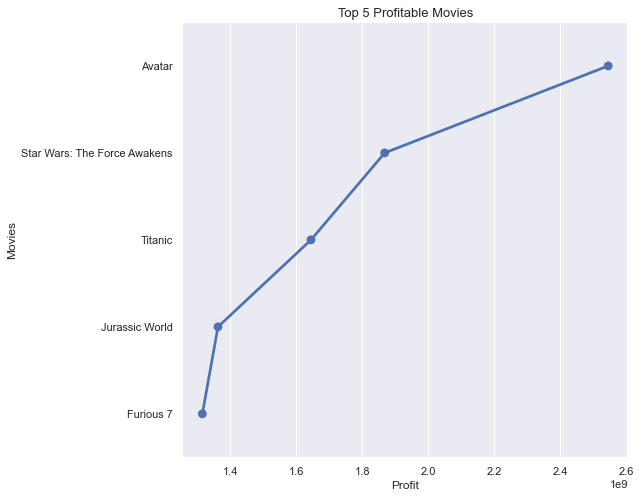

In [17]:
# I will create a plot which contains top 5 movies earn highest profit.
# And sort the 'profit' column in decending order and store it in the new dataframe

sort_profit = pd.DataFrame(df_tmdb['profit'].sort_values(ascending = False))
sort_profit['original_title'] = df_tmdb['original_title']
profit_data = list(map(str,(sort_profit['original_title'])))
x = list(profit_data[:5])
y = list(sort_profit['profit'][:5])

# Here create a plot usinf pointplot for top 5 profitable movies.
plo_five = sns.pointplot(x=y,y=x)


#Name the title and labels of the plot and figure size.
sns.set(rc={'figure.figsize':(8,8)})
plo_five.set_title("Top 5 Profitable Movies",fontsize = 13)
plo_five.set_xlabel("Profit",fontsize = 12)
plo_five.set_ylabel("Movies",fontsize = 12)
sns.set_style("darkgrid")

- Based on the plot the top is **Avatar** followed by **Star Wars: the force Awakens** and **Titanic**

### Research Question 2  (Movie which has the highest and lowest rate?)

I will use the function I made above 'find_max_min' to find the highest and lowest rate

In [18]:
#Using 'find_max_min' function passsing 'vote_average'
find_max_min('vote_average')

Movie which has Highest vote_average :  The Shawshank Redemption
Movie which has Lowest vote_average  :  Foodfight!


,4178,4859
id,278,116977
popularity,7.19204,0.111351
budget,2.5e+07,6.5e+07
revenue,2.83415e+07,73706
original_title,The Shawshank Redemption,Foodfight!
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
director,Frank Darabont,Lawrence Kasanoff
keywords,prison|corruption|police brutality|prison cell...,supermarket|fight|product placement|computer a...
runtime,142,87
genres,Drama|Crime,Animation|Action|Comedy|Family


- The first column is the movie with the highest rate **The Shawshank Redemption** which has the max rating of 84% and directed by Frank Darabont

- The second column is the movie with the lowest rate **Foodfight!** which has the min rating of 22% and directed by Lawrence Kasanoff

**2-A Top 5 lowest rated movies**

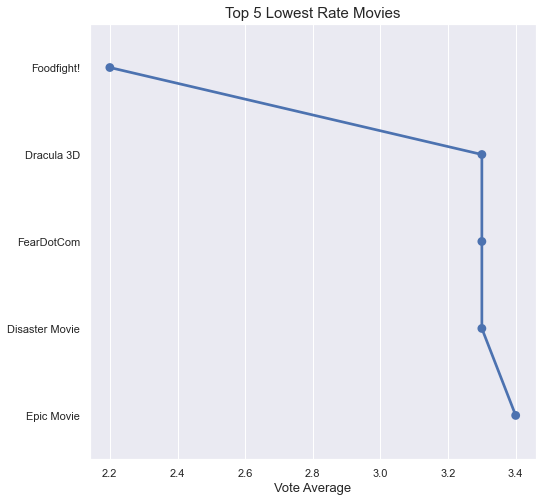

In [19]:
#I will sort the 'vote_average' column in ascending order store it in the a new dataframe.
sort_vote = pd.DataFrame(df_tmdb['vote_average'].sort_values(ascending = True))
sort_vote['original_title'] = df_tmdb['original_title']
sort_vote_data = list(map(str,(sort_vote['original_title'])))

#Getting the top 5 lowest rate movies data 
x = list(sort_vote_data[:5])
y = list(sort_vote['vote_average'][:5])

# Make the point plot and name the title and labels.
pol_vote = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
pol_vote.set_title("Top 5 Lowest Rate Movies",fontsize = 15)
pol_vote.set_xlabel("Vote Average",fontsize = 13)
# the stylesheet
sns.set_style("darkgrid")

- As shown the **Foodfight!** is lowest rate followed by **FearDotCom** and **Disaster Movie**

### Research Question 3  (Which the most popular runtime length of a movie?)

I will need to group the popularity of a movie according to its runtime, to find the most popular length.

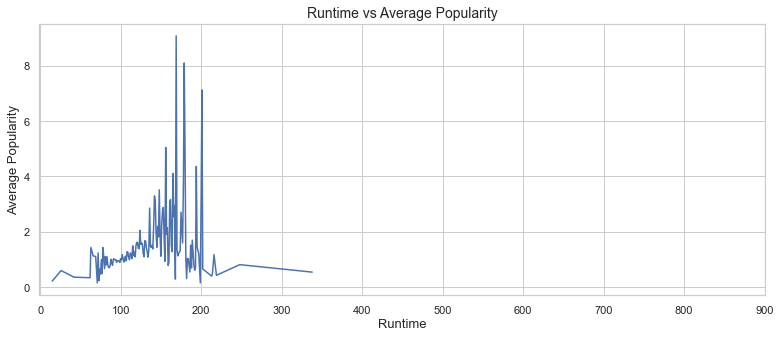

In [21]:
#using the groupby function to group the popularity based on its runtime and find the mean
runt_popu = df_tmdb.groupby('runtime')['popularity'].mean()
#create the plot
runt_popu.plot(figsize = (13,5),xticks=np.arange(0,1000,100))

#Name the title, x-label, y-label, and the figure size 
plt.title("Runtime vs Average Popularity",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
sns.set(rc={'figure.figsize':(8,8)})
sns.set_style("whitegrid")

- Based on the plot the range of the movie runtime is 100-200,  is the most popular than others.

### Research Question 4 (The average runtime of movies over years?)

I will need to the group the data according to their release_year and find the mean.

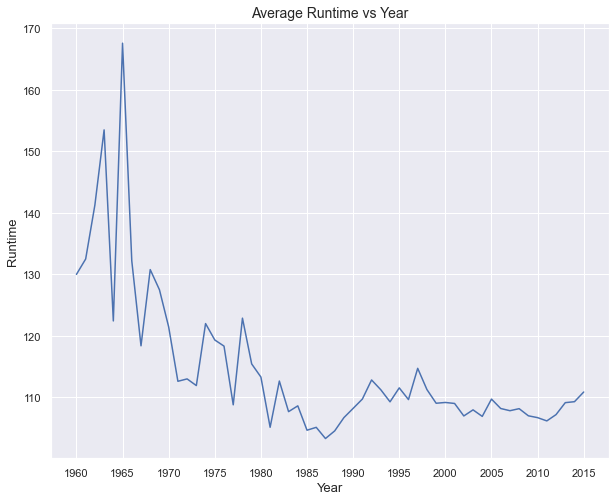

In [23]:
# Here I will calculate the mean and group by release year
runt_year = df_tmdb.groupby('release_year')['runtime'].mean()

#create the plot
runt_year.plot(xticks = np.arange(1960,2016,5))

#Name the title and the labels of the plot and figure size
sns.set(rc={'figure.figsize':(10,8)})
plt.title("Average Runtime vs Year",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("darkgrid")

- Based on the plot the movie duration is decreasing over the years. And the average runtime duration of the movies is around 110 Minutes now. I assume nobody wants to watch a long movie nowadays.

### Research Question 5  (Is the rating of movies increase or decrease or the same over years ?)

I will need to work with release_year column and the the average movie rating in vote_average column. Also, I will need the group by release_year and calculate the mean of vote_average for each year

Text(0, 0.5, 'Average Rating')

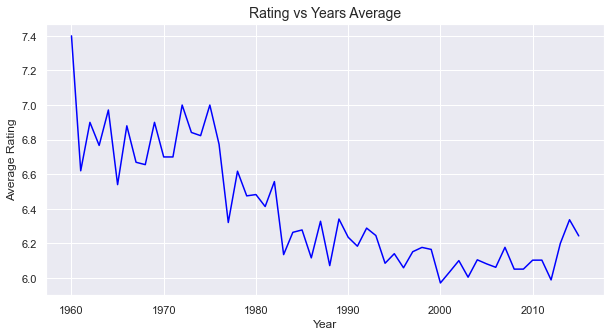

In [24]:
# Here I will  calculate the mean of vote_average then groupby the result by release_year 

rating_year_avg = df_tmdb.groupby('release_year')['vote_average'].mean()

# Plot release_year and vote_average relationship 
rating_year_avg.plot(kind='line',color='blue', figsize = (10,5))

# Name the title and the labels of the plot
plt.title("Rating vs Years Average",fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Rating')

 - The ratings decrease over years. 
 - According to the plot, the old movies had better ratings than the new ones. 

### Research Question 6 (Which movie genre has the highest release?)

I will create a function that take genres and split it into catogry to find the hishest release

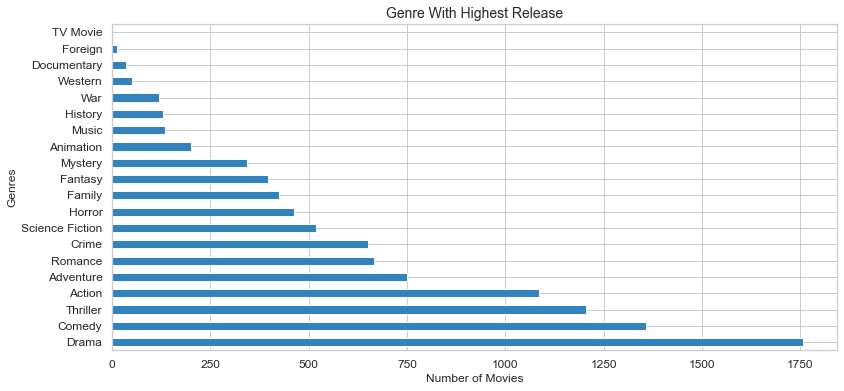

In [27]:
# make a function that will split the genres, return the number of each genre
def genre_split_and_count(x):
    #concatenate all the rows of the genrs
    dt_plot = df_tmdb[x].str.cat(sep = '|')
    dt = pd.Series(dt_plot.split('|'))

    no_genre = dt.value_counts(ascending=False)
    return no_genre

#Here I call the function to count the movies of each genre
total_gen_mov = genre_split_and_count('genres')

#plot a 'barh' plot using plot function for 'genre vs number of movies'
total_gen_mov.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

# Name the title and the labels of the plot
plt.title("Genre With Highest Release",fontsize=14)
plt.xlabel('Number of Movies',fontsize=12)
plt.ylabel("Genres",fontsize= 12)
sns.set_style("whitegrid")

- Based on to the plot **Drama** genre has the highest release of movies around(1755) followed by **Comedy** around(1300) and **Thriller** around(1150)

<a id='conclusions'></a>
## Conclusions

 **Conclusions :** 

- **Avatar**, **Star Wars**, and **Titanic** are the most profitable movies
- **Foodfight!**, **FearDotCom**, and **Disaster Movie** have the worst rate
- The movies rating decrease over years and the old movies have a high rate
- The average runtime of a movie is in the range of 100-200, and is the most popular than others
- The movie duration decreases over years
- **Drama** genre has highest number of release followed by **Comedy** and **Thirller**

**Limitations :**
 
 
- Missing values in the dataset and duplicated rows 
- The zero value in budget, revenue, and runtime, which had to remove many rows.
- Revenue and budget does not have currency unit.
- Inappropriate data type.